## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "Resources/Mouse_metadata.csv"
study_results = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merged_df = mouse_metadata.merge(study_results, how="outer", on="Mouse ID")

# Display the data table for preview
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
# unique_mice = merged_df['Mouse ID'].nunique()
total_mice = merged_df['Mouse ID'].count()
mice_numbers_df = pd.DataFrame({"Total Mice" :[total_mice]})
mice_numbers_df

,Total Mice
0,1893


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 



In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = merged_df.drop_duplicates(subset=["Mouse ID", "Timepoint"])
clean_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_data_df['Mouse ID'].count()
mice_numbers_df = pd.DataFrame({"Total Mice" :[clean_mice]})
mice_numbers_df

,Total Mice
0,1888


## Summary Statistics

In [7]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
regimen_data = clean_data_df.groupby('Drug Regimen')
drug_labels = ['Capomulin', 'Ceftamin', 'Infubinol','Ketapril', 'Naftisol', 'Placebo', 'Propriva','Ramicane', 'Stelasyn', 'Zoniferol']

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = regimen_data["Tumor Volume (mm3)"].mean()
median = regimen_data["Tumor Volume (mm3)"].median()
variance = regimen_data["Tumor Volume (mm3)"].var()
deviation = regimen_data["Tumor Volume (mm3)"].std()
SEM = regimen_data["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
summary_stats_df = pd.DataFrame({"Mean" : mean,
                               "Median" : median,
                               "Variance" : variance,
                               "Standard Deviation": deviation,
                               "SEM" : SEM})

summary_stats_df.style.format({"Mean": "{:,.2f}",
                              "Median": "{:,.2f}",
                              "Variance" : "{:,.2f}",
                              "Standard Deviation" : "{:,.2f}",
                               "SEM": "{:,.2f}"})


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

<AxesSubplot:>

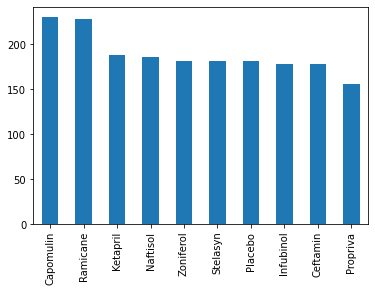

In [8]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
clean_data_df['Drug Regimen'].value_counts().plot.bar()
# Add chart labels

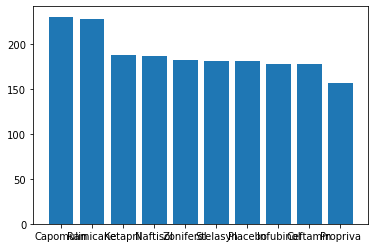

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.bar(clean_data_df['Drug Regimen'].value_counts().index, clean_data_df['Drug Regimen'].value_counts().values)
plt.show()
# Add chart labels


<AxesSubplot:ylabel='Sex'>

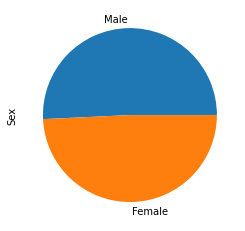

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
clean_data_df['Sex'].value_counts().plot.pie()
# Add chart labels


<function matplotlib.pyplot.show(close=None, block=None)>

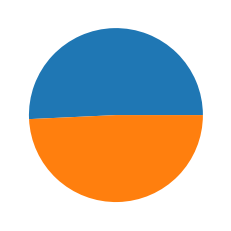

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(clean_data_df['Sex'].value_counts())
plt.show
# Add chart labels


## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
clean_data_df.groupby(['Mouse ID']).max()['Timepoint']

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 249, dtype: int64

In [13]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
clean_data_df.merge(pd.DataFrame(clean_data_df.groupby(['Mouse ID']).max()['Timepoint']), on=['Timepoint','Mouse ID'], how='inner')

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28,5,45.934712,0
245,z435,Propriva,Female,12,26,10,48.710661,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [85]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_df = clean_data_df[clean_data_df['Drug Regimen']==treatment]
    
    # add subset 
    tumor_volume.append(treatment_df['Tumor Volume (mm3)'])
    
    # Determine outliers using upper and lower bounds
    quartiles = (treatment_df['Tumor Volume (mm3)']).quantile([.25,.5,.75])
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = (upperq-lowerq).round(2)
    lower_bound = (lowerq - (1.5*iqr)).round(2)
    upper_bound = (upperq + (1.5*iqr)).round(2)
 
    print(f'The lower quartile of {treatment} is {lowerq}')
    print(f'The upper quartile of {treatment} is {upperq}')       
    print(f'The inter quartile range of {treatment} is {iqr}')
    print(f'Values below {lower_bound} for {treatment} may be outliers')
    print(f'Values above {upper_bound} for {treatment} may be outliers')
    print(f'------------------------------------------------')

The lower quartile of Capomulin is 37.69
The upper quartile of Capomulin is 45.0
The inter quartile range of Capomulin is 7.31
Values below 26.72 for Capomulin may be outliers
Values above 55.96 for Capomulin may be outliers
------------------------------------------------
The lower quartile of Ramicane is 36.67
The upper quartile of Ramicane is 45.0
The inter quartile range of Ramicane is 8.33
Values below 24.18 for Ramicane may be outliers
Values above 57.5 for Ramicane may be outliers
------------------------------------------------
The lower quartile of Infubinol is 47.31
The upper quartile of Infubinol is 57.31
The inter quartile range of Infubinol is 10.0
Values below 32.31 for Infubinol may be outliers
Values above 72.31 for Infubinol may be outliers
------------------------------------------------
The lower quartile of Ceftamin is 47.21
The upper quartile of Ceftamin is 56.8
The inter quartile range of Ceftamin is 9.59
Values below 32.83 for Ceftamin may be outliers
Values abov

{'whiskers': [<matplotlib.lines.Line2D at 0x1d20088efa0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d2007d56a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d20088ec40>,
 'medians': [<matplotlib.lines.Line2D at 0x1d2007d5d60>,
 'fliers': [<matplotlib.lines.Line2D at 0x1d2007f2100>,
 'means': []}

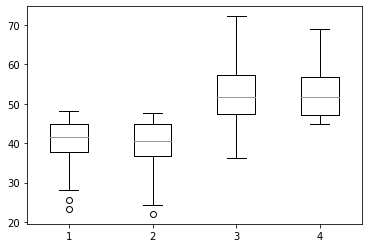

In [67]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_volume)

## Line and Scatter Plots

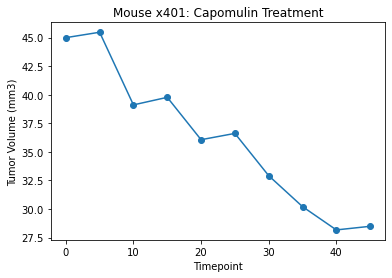

In [59]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Make DataFrame of all mice treated with Capomulin
capomulin_df = clean_data_df[clean_data_df["Drug Regimen"] == "Capomulin"]

# Identify a single mouse
mousey = capomulin_df.loc[clean_data_df['Mouse ID'] == 'x401']

# Plot the line chart
plt.plot(mousey['Timepoint'], mousey['Tumor Volume (mm3)'], marker='o')

#Add labels & display
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse x401: Capomulin Treatment')
plt.show()

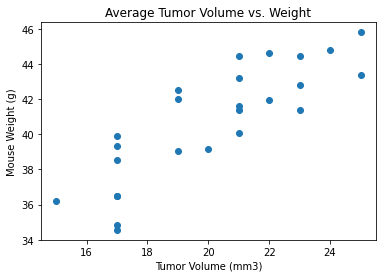

In [61]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# tumor_avg = treatment_df['Capomulin'].mean()
# print(tumor_avg)
capomulin_df = clean_data_df[clean_data_df["Drug Regimen"] == "Capomulin"]
avg_cap_vol = capomulin_df.groupby(['Mouse ID']).mean()

plt.scatter(avg_cap_vol['Weight (g)'],avg_cap_vol['Tumor Volume (mm3)'])
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Mouse Weight (g)")
plt.title('Average Tumor Volume vs. Weight')
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


# poly1d_fn is now a function which takes in x and returns an estimate for y
plt.plot(avg_cap_vol['Weight (g)'], avg_cap_vol['Tumor Volume (mm3)'], 'yo', avg_cap_vol['Weight (g)'], poly1d_fn(avg_cap_vol['Weight (g)']), '--k')
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Mouse Weight")
plt.title("Coefficient and Linear Regression Model of Tumor Volume on Capomulin")
plt.show()